In [18]:
using HDF5
using DynamicPolynomials
using Plots

using Optim
using Random

# Define polynomial variables
@polyvar w a

function get_dmd_tf_pop_obj(gamma)
    h5open("../MODELS/TS_POP_objectives_simple_2024-Jan-13_at_11-46.h5","r") do fid # read file, preserve existing content
        polynomial_str = read(fid["gamma_"*gamma]["dmd_ts_pop_objective"]) 
        # Parse the string into a DynamicPolynomial
        #@polyvar w a
        poly = eval(Meta.parse(polynomial_str))
        return(poly)
    end
end

function scaling_poly(p::Polynomial)

    X = transpose(hcat([exponents(t) for t in terms(p)]...))

    # Get the scaling via linear regression
    scaling = X \ log.(abs.(coefficients(p)))

    exp.(abs.(scaling)) # 
end

function local_rand_min(p)

    pd = p / maximum(abs.(coefficients(p)))

    # find variable scaling
    scale = scaling_poly(pd)

    # scale the polynomial
    p_scaled = subs(pd, variables(pd) => scale .* variables(pd))

    num_iterations = 100

    # Initialize the best minimizer and the minimum value
    best_minimizer = nothing
    best_min_value = Inf

    num_of_variables = length(variables(pd))

    for _ in 1:num_iterations
        # Generate a random initial condition
        initial_point = rand(num_of_variables).*250

        # Run local optimization
        result = Optim.optimize(p_scaled, initial_point, BFGS())
        #println(Optim.minimum(result))

        # Update the best minimizer if a better one is found
        if Optim.minimum(result) < best_min_value
            
            best_minimizer = Optim.minimizer(result)
            best_min_value = Optim.minimum(result)
            
        end

    end

    minimizer_scaled = scale .* best_minimizer

    solution = variables(p_scaled) => minimizer_scaled

end

function plot_objective(objective)

    #objective=get_dmd_tf_pop_obj(γᵢ)

    function f(w_val, a_val)
        return objective(variables(objective)[1] => w_val, variables(objective)[2] => a_val) #sqrt(abs(g_val))
    end

    w = range(-30, 30, length=1000)
    a = range(-10, 10, length=1000)
    #g = range(-10, 10, length=500)
    z = @. f(w', a)

    contour(w, a, log.(z), legend=false)#, margin=2, padding=2) # yaxis=:log, #xaxis=:log,
    #ylabel!("√γ")
    #heatmap(w, g, log.(z))
    #title!(title_prompt*"\n\n γˢᵇ="*γᵢ)
    xlabel!("ω")
    ylabel!("\n\n √γ")
    
    #scatter!([25.126], [sqrt(parse(Float64, γᵢ))], color=:green, legend=false)

end

function plot_objective_g(γᵢ)

    objective = get_dmd_tf_pop_obj(γᵢ)

    function f(w_val, a_val)
        return objective(variables(objective)[1] => w_val, variables(objective)[2] => a_val) #sqrt(abs(g_val))
    end

    w = range(-30, 30, length=1000)
    a = range(-10, 10, length=1000)
    #g = range(-10, 10, length=500)
    z = @. f(w', a)

    contour(w, a, log.(z), legend=false)#, margin=2, padding=2) # yaxis=:log, #xaxis=:log,
    #ylabel!("√γ")
    #heatmap(w, g, log.(z))
    title!(" γˢᵇ="*γᵢ)
    xlabel!("ω")
    ylabel!("\n\n √γ")
    scatter!([25.126], [sqrt(parse(Float64, γᵢ))], color=:green, legend=false)

end

plot_objective_g (generic function with 1 method)

In [19]:
g_list = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]
poly = get_dmd_tf_pop_obj("0.25133")

7.655322260029137e67 - 1.0432028877693255e68w + 1.0581912818852446e68a² + 1.7274497824054477e68w² - 1.8077619255605908e68wa² - 1.1004252031378692e68w³ + 8.937931480441782e67a⁴ + 1.6504464757638102e68w²a² + 4.752055972197257e67w⁴ - 8.921408110680701e67wa⁴ - 8.829852223965582e67w³a² - 5.976044265828763e66w⁵ + 2.906392353924719e67a⁶ + 6.626424509697454e67w²a⁴ + 8.992454118145482e66w⁴a² + 3.2501648382095913e65w⁶ - 2.4180938763631242e67wa⁶ - 6.208809884927013e66w³a⁴ - 3.356517052497513e65w⁵a² - 8.176234156018012e63w⁷ + 5.843154301457848e66a⁸ + 3.087969327947989e66w²a⁶ + 2.521380196009596e65w⁴a⁴ + 4.284787007158858e63w⁶a² + 7.841457977338361e61w⁸ - 1.1786997046174547e66wa⁸ - 1.6782585262487544e65w³a⁶ - 6.132175617013503e63w⁵a⁴ + 2.0996394960290518e65a¹⁰ + 6.512841908405001e64w²a⁸ + 3.2135902553691412e63w⁴a⁶ + 7.841457977338355e61w⁶a⁴ - 2.0978231578109412e64wa¹⁰ - 1.5330439042533746e63w³a⁸ + 5.601861105655008e63a¹² + 8.0339756384228475e62w²a¹⁰ + 2.94054674150188e61w⁴a⁸ - 1.2775365868778117e62

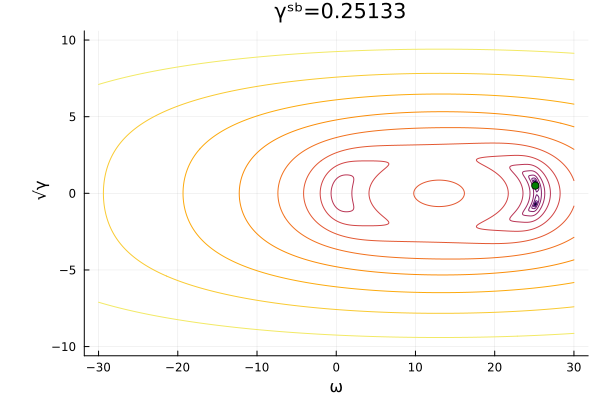

In [20]:
plot_objective_g("0.25133")

In [13]:
variables(poly)

2-element Vector{Variable{DynamicPolynomials.Commutative{DynamicPolynomials.CreationOrder}, Graded{LexOrder}}}:
 w
 a

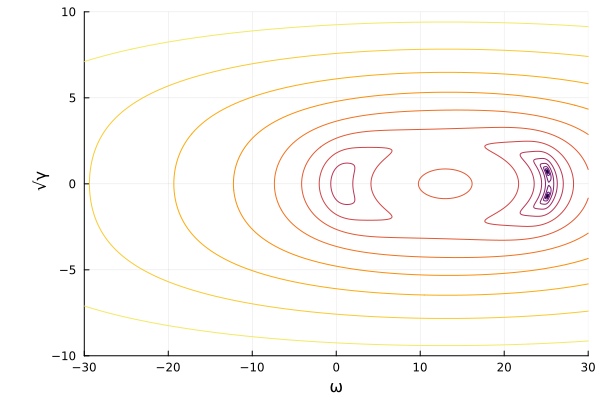

In [16]:
plot_objective(poly)

In [21]:
local_rand_min(poly)

Variable{DynamicPolynomials.Commutative{DynamicPolynomials.CreationOrder}, Graded{LexOrder}}[w, a] => [25.153832455141217, 0.7003639439063596]